<hr style="border:1px solid gray"> </hr>

# Lecture: What is Homotopy Continuation?

<u>Polynomial homotopy continuation</u> is a method for solving systems of polynomials equations over the complex numbers $\mathbb C$.

## Example:
Polynomials in variables $x,y$: 

\begin{align*}
\text{✅} \quad f(x,y) &= 4x^2 + 2xy - (10 + 4i) (y-1)\\[0.5em]
\text{❌} \quad g(x,y) &= 13 \exp(x) + y + 1\\[0.5em]
\text{❌} \quad h(x,y) &= \sqrt{x+y} - y^2\\
\end{align*}



<hr style="border:1px solid gray"> </hr>

In the following, let

$$F(x_1,\ldots,x_n) = \begin{bmatrix} f_1(x_1,\ldots,x_n)\\ \vdots \\ f_m(x_1,\ldots,x_n)\end{bmatrix}$$

be a **system** of $m$ polynomials in $n$ variables.

<br>

* If $n=m$, we call $F$ <u>a square system</u>

* If $n<m$, we call $F$ <u>overdetermined</u>

* If $n>m$, we call $F$ <u>underdetermined</u>

<br>

<p style="border:3px; border-style:solid; padding: 0.5em; text-align:center">We assume $m=n$.
</p>

<hr style="border:1px solid gray"> </hr>

# What solving means

In the context of homotopy continuation *solving* means to compute **numerical approximations** of **isolated solutions**.

Let us look at an example: take 

$$F(x,y) = \begin{bmatrix} 2x^2 + y^2 - 1\\ 2x^2 - y\end{bmatrix}.$$

The zeros $F(x,y)=0$ are the intersection points of two curves:

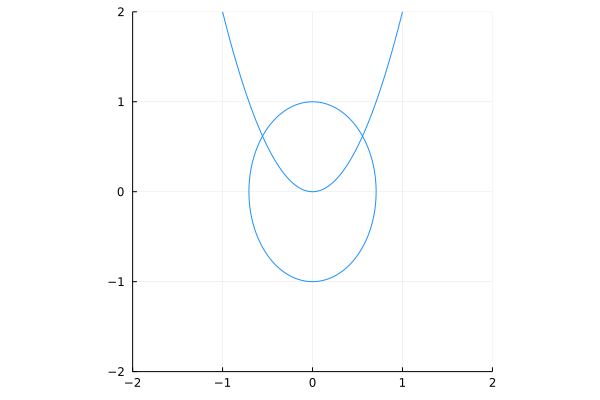

In [15]:
using ImplicitPlots, Plots, HomotopyContinuation

@var x y

f₁ = 2x^2 + y^2 - 1; f₂ = 2x^2 - y

implicit_plot(f₁; legend = false)
implicit_plot!(f₂; xlim = (-2,2), ylim = (-2,2))

Homotopy Continuation tries to 

<p style="border:3px; border-style:solid; padding: 0.5em; text-align:center">compute points $\xi\in\mathbb C^n$ such that the distance $\Vert \xi-\zeta\Vert$ is small,
</p>


where $\zeta$ is a true zero: 

$$F(\zeta)=0.$$

We call this a <u>numerical approximation</u>.

<br>

<hr style="border:1px solid gray"> </hr>

## Exact Solutions

The exact solutions of 
$F(x,y) = [2x^2 + y^2 - 1,  2x^2 - y] = 0$
are

\begin{align*}
(x,y) &= (\tfrac{1}{2}\sqrt{\sqrt{5} -1},\quad \tfrac{1}{2}(\sqrt{5} -1)\,)\\[0.5em]
(x,y) &= (-\tfrac{1}{2}\sqrt{\sqrt{5} -1},\quad \tfrac{1}{2}(\sqrt{5} -1)\,)\\[0.5em]
(x,y) &= (\tfrac{i}{2}\sqrt{\sqrt{5} +1},\quad -(\sqrt{5} +1)\,)\\[0.5em]
(x,y) &= (-\tfrac{i}{2}\sqrt{\sqrt{5} +1},\quad -(\sqrt{5} +1)\,)\\
\end{align*}

<br>

Why do we even compute numerical approximations when we can have such exact results?

<br>

<u>Answer 1:</u> not all zeros can be written in terms of simple operations like $+,-,\cdot,/,\sqrt{\quad}$.



<u>Answer 2:</u> numerical methods are often faster than exact computations, especially when the problems become more complicated.

<hr style="border:1px solid gray"> </hr>

# Software

There are several software packages for polynomial homotopy continuation. Most notably:

* <u>Bertini</u>
* HOM4PS
* <u>HomotopyContinuation.jl</u> (in Julia)
* NAG4M2 (in Macaulay2)
* <u>PHCpack</u>

<hr style="border:1px solid gray"> </hr>

## Bertini

In [16]:
using Bertini

@var x y
f₁ = 2x^2 + y^2 - 1; f₂ = 2x^2 - y
F = [f₁; f₂]

bertini_result = bertini(F)

File path: /var/folders/dm/81rrvn3d6hxb31lf0brq019m0000gn/T/jl_j7afDK

   Bertini(TM) v1.6
    (May 22, 2018)

 D.J. Bates, J.D. Hauenstein,
 A.J. Sommese, C.W. Wampler

(using GMP v6.1.2, MPFR v4.1.0)



NOTE: You have requested to use adaptive path tracking.  Please make sure that you have
setup the following tolerances appropriately:
CoeffBound: 3.751011000000e+00, DegreeBound: 2.000000000000e+00
AMPSafetyDigits1: 1, AMPSafetyDigits2: 1, AMPMaxPrec: 1024

Tracking path 0 of 4

Finite Solution Summary

NOTE: nonsingular vs singular is based on condition number and identical endpoints

		| Number of real solns	|  Number of non-real solns	|  Total
------------------------------------------------------------------------------------------
Non-singular	|	2		|		2		|   4
Singular	|	0		|		0		|   0
------------------------------------------------------------------------------------------
Total		|	2		|		2		|   4


Finite Multiplicity Summary

  Multiplicity	|  Number of real solns	|  Number of

Dict{Symbol, Any} with 3 entries:
  :runtime          => 0.00617
  :file_path        => "/var/folders/dm/81rrvn3d6hxb31lf0brq019m0000gn/T/jl_j7a…
  :finite_solutions => Vector{ComplexF64}[[0.555893-5.55112e-17im, 0.618034-2.7…

In [17]:
zeros = bertini_result[:finite_solutions]
map(s -> round.(s, digits = 3), zeros)

4-element Vector{Vector{ComplexF64}}:
 [0.556 - 0.0im, 0.618 - 0.0im]
 [-0.0 + 0.899im, -1.618 - 0.0im]
 [-0.556 + 0.0im, 0.618 - 0.0im]
 [0.0 - 0.899im, -1.618 - 0.0im]

<hr style="border:1px solid gray"> </hr>

## PHCPack

In [18]:
using PHCpack

@var x y
f₁ = 2x^2 + y^2 - 1; f₂ = 2x^2 - y
F = [f₁; f₂]

phc(F)

File path: /var/folders/dm/81rrvn3d6hxb31lf0brq019m0000gn/T/jl_Xzgir7
  0.142523 seconds (172 allocations: 12.281 KiB)
A list of 4 solutions has been refined :
Number of regular solutions     : 4.
Number of singular solutions    : 0.
Number of real solutions        : 2.
Number of complex solutions     : 2.
Number of clustered solutions   : 0.
Number of solutions at infinity : 0.
Number of failures              : 0.
Frequency tables for correction, residual, and condition numbers :
FreqCorr :  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 : 4
FreqResi :  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 : 4
FreqCond :  4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 : 4
Small correction terms and residuals counted to the right.
Well conditioned and distinct roots counted to the left.

TIMING INFORMATION for Solving the polynomial system
The elapsed time in seconds was                  0.004008000 =  0h 0m 0s  4ms
User time in seconds was                         0.001714000 =  0h 0m 0s  2ms
System CPU time in seconds was              

<hr style="border:1px solid gray"> </hr>

## HomotopyContinuation.jl

In [19]:
using HomotopyContinuation

@var x y
f₁ = 2x^2 + y^2 - 1; f₂ = 2x^2 - y
F = [f₁; f₂]

result = solve(F)

Result with 4 solutions
• 4 paths tracked
• 4 non-singular solutions (2 real)
• random_seed: 0xe5fb439c
• start_system: :polyhedral


In [20]:
zeros = solutions(result)
map(s -> round.(s, digits = 3), zeros)

4-element Vector{Vector{ComplexF64}}:
 [0.556 + 0.0im, 0.618 - 0.0im]
 [0.0 + 0.899im, -1.618 + 0.0im]
 [-0.556 + 0.0im, 0.618 - 0.0im]
 [-0.0 - 0.899im, -1.618 + 0.0im]

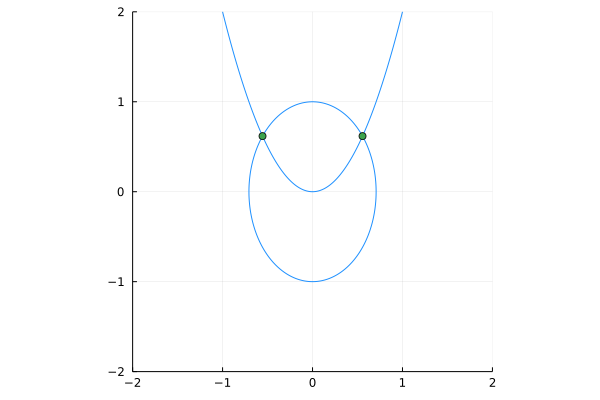

In [21]:
implicit_plot(f₁; legend = false)
implicit_plot!(f₂; xlim = (-2,2), ylim = (-2,2))
r = real_solutions(result)
scatter!(hcat(r...)[1,:], hcat(r...)[2,:])

<hr style="border:1px solid gray"> </hr>


# The basic idea of homotopy continuation

Let us discuss the basic idea underlying homotopy continuation. 

We denote 

\begin{align*}
&\mathbb C[x_1,\ldots,x_n]_{d} \\
&:= \{\text{polynomials with coeff. in $\mathbb C$ of degree $\leq d$ in the variables $x_1,\ldots,x_n$}\}.
\end{align*}

Let $d_1,\ldots,d_n$ and define

$$\mathcal R := \mathbb C[x_1,\ldots,x_n]_{d_1} \times \cdots \times \mathbb C[x_1,\ldots,x_n]_{d_n}$$

to be the vector space of systems of $n$ polynomials in $n$ variables with complex coefficients and degrees $(d_1,\ldots,d_n)$.

<br> 

Suppose that the <u>system we are interested in</u> is 

$$F(x) \in \mathcal R \quad (\text{ = target system}).$$

Suppose that there is another system

$$G(x) \in \mathcal R  \quad (\text{ = start system}).$$

and that we know or can easily compute

$$\text{a zero $\zeta$ with $G(\zeta)=0$.}$$

Let $H(x,t): \mathcal R \times [0,1] \to \mathcal R$
be a **homotopy** in $\mathcal R$ with 

$$H(x,1) = G(x)\quad \text{and}\quad H(x,0)=F(x).$$ 



<p style="border:3px; border-style:solid; padding: 0.5em; text-align:center">
The idea is to track $\zeta$ along the homotopy $H(x,t)$ from $t=1$ to $t=0$.
</p>

<img src="geometry.png" width="300"> 


<br>

## Example  

<br>
<table>
  <tr>
    <td>
      <br>
       

$n=m=1$

$G(x)=x^8 -1$.

$F(x) = $ random polynomial of degree 8.

The zeros of $G$ are 

$$\{\exp(2\pi i/8)\mid 1\leq i\leq 8\}$$

(points on the unit circle)

As $t$ moves from $1$ to $0$ the blue points move in $\mathbb C$.
      </td>
     <td>
    <img src="tracking.gif" width="400" style="float:right;">
</td>
  </tr>
 </table>
<br>







<hr style="border:1px solid gray"> </hr>

# What tracking means

Tracking means to compute a numerical approximation of the **solution curve** $x(t)$ with

$$H(x(t), t) = 0.$$


<img src="geometry.png" width="300">

Differentiating at $t$ gives:

$$\frac{\partial}{\partial t} H(x,t) + \frac{\partial}{\partial x} H(x,t) \,\frac{\partial}{\partial t} x(t) = 0.$$

<br>
Computing $x(t)$ is equivalent to solving an 
<bdi style="border:3px; border-style:solid; padding: 0.2em;">
ODE initial value problem!
</bdi>

<br>
<br>

Numerical approximation means that we compute discrete values $t_1,t_2,\ldots,t_k,\ldots,$ and points $\widetilde{x}_1,\widetilde{x}_2,\ldots,\widetilde{x}_k,\ldots$ such that 

$$\Vert \widetilde{x}_k - x(t_k)\Vert \text{ is small for all } k.$$ 

We can move $\widetilde{x}_k$ towards $x(t_k)$ using *Newton's method*. 

This is called the <bdi style="border:3px; border-style:solid; padding: 0.2em;">corrector</bdi>.

<br>

<img src="predictor-corrector.png" width="400"> 

<br>

The <bdi style="border:3px; border-style:solid; padding: 0.2em;">predictor</bdi> produces $\widetilde{x}_{k}$ from an approximation of $x(t_{k-1})$. 


There are many predictor methods for ODEs. HomotopyContinuation.jl uses a variant of the so called *Padé-predictor*. Bertini uses *adaptive step-size*.

(Sascha and Simon can tell more about this).

<hr style="border:1px solid gray"> </hr>

# Gotta catch them all

So far, the discussion evolved around tracking a single solution curve and hence computing a single solution.

Polynomial homotopy continuation can do more: it can compute <bdi style="border:3px; border-style:solid; padding: 0.2em;">all solutions</bdi>.

Recall the definition 


\begin{align*}
&\mathbb C[x_1,\ldots,x_n]_{d} \\
&:= \{\text{polynomials with coeff. in $\mathbb C$ of degree $\leq d$ in the variables $x_1,\ldots,x_n$}\}.
\end{align*}

and

$$\mathcal R := \mathbb C[x_1,\ldots,x_n]_{d_1} \times \cdots \times \mathbb C[x_1,\ldots,x_n]_{d_n}.$$

Suppose 

$$F(x)\in\mathcal R.$$

Then, we can take the following as start system

$$G(x) = \begin{bmatrix} x_1^{d_1} - 1\\ \vdots \\ x_n^{d_n} - 1\end{bmatrix}.$$

$G(x)$ is called a **total degree start system**.

<br>

<u> **Theorem**</u> (Bézout's theorem): $F(x)=0$ has at most $d_1\cdots d_n$ isolated solutions.

<br>

This means that $G(x)$ has at least as many isolated solutions as $F(x)$. 

If we can find for each zero $F(\zeta)=0$ a corresponding zero $G(\xi)=0$, such that $\xi$ gets tracked towards $\zeta,$ we can compute all solutions of $F(x)=0$.

<br>


<bdi style="border:3px; border-style:solid; padding: 0.2em;">Problem 1:</bdi>   Many zeros of $G(x)$ do not get tracked towards a zero of $F$. 

Computation is wasteful!


In [22]:
@var x y
F = [x^2 - x^2 * y^2 + 2y^2 - 1;  x - 4x * y + 3]
solve(F, start_system = :total_degree)

Result with 4 solutions
• 8 paths tracked
• 4 non-singular solutions (0 real)
• random_seed: 0x99a7c362
• start_system: :total_degree


<br>

<bdi style="border:3px; border-style:solid; padding: 0.2em;">
Problem 2:</bdi>   Which homotopy to take?

<br>
<br>

It is appealing to take the *straight-line homotopy* $H(x,t) = (1-t)F(x) + tG(x)$.

It is better to take a <u>path in the complex numbers</u>. <bdi style="border:3px; border-style:solid; padding: 0.2em;">
Why?</bdi> 

<br>

Predictor-corrector methods rely on  $\frac{\partial}{\partial x} H(x,t)$ being invertible.

<br>

The space of polynomial systems $\Sigma \subset \mathcal R$, whose derivative is *not* invertible, form an <u>algebraic subvariety</u> of $\mathcal R$. 

$\Sigma$ is called the **discriminant**.

* In $\mathcal R\cap \{\text{systems with real coefficients}\}$ it has real codimension $1$.

* In $\mathcal R$ it has real codimension $2$. We can go around it!

<br>

This is why one often uses the homotopy

$$H(x,t) = (1-t)F(x) + \lambda\, t G(x),$$

where $\lambda\in\mathbb C\setminus \mathbb R$ is a randomly chosen complex number. 

## Example

The space of degree-2 univariate polynomials is $\mathbb C[x] = \{px^2 + qx + r \mid p,q,r\in\mathbb C, p\neq 0\}$.

Put $a:=\frac{q}{p}$ and $b:=\frac{r}{p}$. Then $\Sigma = \{a^2 - 4b = 0\}$.

<br>
<table>
  <tr>
    <td><img src="poly_deg_2.png" width="450"> </td>
     <td><img src="poly_deg_2_C.png" width="450"> </td>
  </tr>
 </table>
<br>

<hr style="border:1px solid gray"> </hr>

# Start systems

The start system 
$$G(x) = \begin{bmatrix} x_1^{d_1} - 1\\ \vdots \\ x_n^{d_n} - 1\end{bmatrix}.$$
is not always an optimal choice.

<br>

<bdi style="border:3px; border-style:solid; padding: 0.2em;">
Are there better choices?</bdi><br>

<br>


Yes, but it is not always easy to construct them.

<br>

In [23]:
@var x y
F = [x^2 - x^2 * y^2 + 2y^2 - 1;  x - 4x * y + 3]
solve(F, start_system = :total_degree) # start system in V₁

Result with 4 solutions
• 8 paths tracked
• 4 non-singular solutions (0 real)
• random_seed: 0x65e42891
• start_system: :total_degree


In [24]:
solve(F, start_system = :polyhedral)   # start system in V₂

Result with 4 solutions
• 4 paths tracked
• 4 non-singular solutions (0 real)
• random_seed: 0xa211e221
• start_system: :polyhedral


<hr style="border:1px solid gray"> </hr>

<br>

At the end of this first lecture we want to show that good start systems exist at least.

**<u>Definition:</u>** Let $V\subset \mathcal R$ be an irreducile algebraic variety. 

For simplicity we assume $V$ is smooth. 

<br>

<p style="border:3px; border-style:solid; padding: 0.5em; text-align:center">
We call $V$ a family of polynomial systems.<br><br>
In Sascha's talk $V$ will be given by a parametrization $F:\mathbb C^N\to V, q\mapsto F(x,q)$.<br><br>
A path in the parameters $q$ defines a path in $V$ so that we can use homotopy continuation.
</p>

<br>

## Example

Consider 

$$F(x,y) = \begin{bmatrix}x^2 - x^2 y^2 + 2y^2 - 1\\  x - 4x y + 3\end{bmatrix}.$$

Then, 

\begin{align*}
F \in V_1 := &\mathbb C[x,y]_4\times \mathbb C[x,y]_2,\text{ and }\\[0.5cm]
F\in V_2 := &\quad \{ax^2 + bx^2 y^2 + c2y^2 + d\mid a,b,c,d\in\mathbb C\} \times \{ax + bx y + c\mid a,b,c\in\mathbb C\} ,
\end{align*}

and

$$V_2\subsetneq V_1.$$

A start system $V_1$ has $8 = 2\cdot 4$ zeros (by Bézout's theorem).

A start system in $V_2$ has 4 zeros (this is called the BKK theorem).

<br>

<hr style="border:1px solid gray"> </hr>

<br>

**<u>Definition:</u>**

(1) $S:=\{(F,z) \in V\times \mathbb C^n \mid F(z)=0\}$.

(2) $\Delta := \{(F,z)\in S \mid \det(JF(z))=0\}$, where $JF(x)=(\frac{\partial f_i}{\partial x_j})_{i,j}$ is the Jacobian matrix.

(3) $\pi:S \to V, (F,z)\mapsto F$.

(4) $\Sigma := \pi(\Delta)$ is the discriminant.

We assume that $\pi$ is surjective (= every system $F\in V$ has a solution).

<br>

**<u>Theorem:</u>** Let $G\in V\setminus \Sigma$ and $F\in V$. The start system is $G$. The target system is $F$.

Let the isolated simple zeros of $G$ and $F$ be

\begin{align*}
\pi^{-1}(G)\setminus \Delta &= \{ (G,z_1),\ldots, (G, z_k)\} \;\;\text{ and }\\[0.2em]
\pi^{-1}(F)\setminus \Delta &= \{ (F,y_1),\ldots, (F, y_\ell)\}
\end{align*}



<br>
<table>
  <tr>
    <td>

Then 

$$k\geq \ell$$

and for almost all paths $\gamma: [0,1]\to V$ with $\gamma(1) = G$ and $\gamma(0)=F$ we find paths 

$$\Gamma_1(t),\ldots,\Gamma_\ell(t)\subset S$$

with 

$$\Gamma_i((0,1]) \cap \Delta = \emptyset \text{ for all } i$$

and a permutation $\sigma\in \mathfrak S_{k}$ such that for all $i$:

$$\Gamma_i(1) = (G, z_{\sigma(i)}),\quad \Gamma_i(0)=(F, y_i)$$
and
$$(\Gamma_i(t))=\gamma(t)$$</td>
     <td><img src="geometry_2.png" width="400"> </td>
  </tr>
 </table>
<br>



<br>

<ul style="border:3px; border-style:solid; padding: 2em;">
  <li style="margin-bottom: 5px;">This theorem means that <u>every</u> $G\in V\setminus \Sigma$ can be used as a start system.</li>
  <li style="margin-bottom: 5px;">All $G\in V\setminus \Sigma$ have $k$ isolated zeros in $\mathbb C^n$ ($k$ is the <u>general</u> number of zeros).
  <li style="margin-bottom: 5px;">A good start system has a $k$, which is not much larger than $\ell$.</li>
  <li style="margin-bottom: 5px;">To find a good start system means that we must find a good $V$.</li>
  <li>The ``larger'' $V$ the larger is $k$.</li>
</ul> 

Going back to the example from above: 

\begin{align*}
F \in V_1 := &\mathbb C[x,y]_4\times \mathbb C[x,y]_2,\text{ and }\\[0.5cm]
F\in V_2 := &\quad \{ax^2 + bx^2 y^2 + c2y^2 + d\mid a,b,c,d\in\mathbb C\} \\
&\times \{ax + bx y + c\mid a,b,c\in\mathbb C\},
\end{align*}

we see that the $k$ of $V_1$ is 8 and the $k$ of $V_2$ is $4<8$.

<br>

<hr style="border:1px solid gray"> </hr>

<br>

**<u>Proof of the theorem:</u>** The discriminant $\Sigma$ is a subvariety of $V$. It has real codimension at least 2. This implies that almost all paths 

$$\gamma: [0,1]\to V \quad\text{ with } \quad \gamma(1) = G(x) \quad\text{ and } \quad \gamma(0)=F(x)$$

are such that 

$$\gamma(\,(0,1]\,) \cap \Sigma = \emptyset.$$

Fix such a path and let $0< t\leq 1$ and

$$F_t = \gamma(t).$$

By assumption $F_t\not \in \Sigma$. 

This implies

<p style="border:3px; border-style:solid; padding: 0.2em; text-align:center;">
for all zeros $\zeta$ of $F_t$:
</p>

$$ (F_t,\zeta)\not\in \Delta \quad\text{and}\quad\det(Jf(\zeta))\neq 0.$$

<br>

Fix one of the zeros $\zeta_t$ of $F_t$.

By the implicit function theorem, there is a neighborhood $\hat{U}_{t} \subset S$ of $(F_t,\zeta_t)$ such that 

$$\pi|_{\hat{U}_{t}}: \hat{U}_{t}\to \pi(\hat{U}_{t})\subset V$$

is invertible. Let

$$U_t:=\pi(\,\hat{U}_{t}\,)\quad \text{ and let }\quad \psi_{t}: U_{t}\to \hat{U}_{t}\subset S$$

be the inverse of $\pi$ on $U_{t}$. 

<br>

We have constructed a family of pairs $(\psi_t, U_t)_{t\in (0,1]}$ indexed by $(0,1]$. 

This gives an open cover of the compact interval $[0,1]$. For this cover we can find a partition of unity $p(t)$  on $(0,1]$ to define

$$\Gamma(t) := \sum_{t\in (0,1]}\, p(t)\cdot\psi_t(\,\gamma(t)\,).$$

<br>

For each $t$ we have $\Gamma(t) = (F_t, \zeta_t)$, where $F_t(\zeta_t)=0$.

<br>

This implies that for any $0< s\leq 1$ there exists an injection of the zeros of $F_{t}(x)$ to the zeros of $F_{s}(x)$.

<p style="border:3px; border-style:solid; padding: 0.2em; text-align:center;">
This implies that the number of zeros is constant along $\gamma(t)$ for<br>
$$ 0<t\leq 1.$$
</p>

Let this number be $k$.

<br>

We can't choose $\gamma(t)$ such that $\gamma(0)\not\in \Sigma$, because $G(x)$ could be in $\Sigma$.

The argument above was based on local considerations. 

Therefore, we can use the same arguments for the simple isolated zeros of $G(x)$,
<p style="border:3px; border-style:solid; padding: 0.2em; text-align:center;">
    but not for <u>all</u> zeros of $G(x)$.
</p>

Nevertheless, we find an injection of the isolated simple zeros of $G(x)$ into the isolated simple zeros of $F(x)$. 

This shows that 

$$k\geq \ell.$$

The proof is finished.